# Forward Thinking Comparison
##### Sean Wade

In [1]:
from forwardThinking.datasets import load_mnist
from forwardThinking.models import PassForwardThinking, ForwardThinking, DNN, WeddingCake
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

from IPython.core.display import HTML
import urllib2
HTML(open("./jupyter.css", "r").read())

Using TensorFlow backend.


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 70})

In [3]:
%load_ext autoreload
%autoreload 2

### Helper Functions

In [4]:
def plot_acc_loss(acc, loss, val_acc=None, val_loss=None):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    if val_acc != None:
        plt.plot(val_acc)
    plt.subplot(122)
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    if val_loss != None:
        plt.plot(val_loss)
    plt.tight_layout()
    plt.show()

In [5]:
def plot_all(model_list):
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.title('Train Accuracy')
    plt.subplot(222)
    plt.title('Test Accuracy')
    plt.subplot(223)
    plt.title('Train Loss')
    plt.subplot(224)
    plt.title('Test Loss')
    
    color = plt.cm.Wistia(np.linspace(0,1,len(model_list)))
    for x, c in zip(model_list, color):
        name, acc, loss, val_acc, val_loss = x
        plt.subplot(221)
        plt.plot(acc, label=name, c=c)
        
        
        plt.subplot(222)
        plt.plot(val_acc, label=name, c=c)
        
        plt.subplot(223)
        plt.xlabel("Num Epochs")
        plt.plot(loss, label=name, c=c)
        
        plt.subplot(224)
        plt.xlabel("Num Epochs")
        plt.plot(val_loss, label=name, c=c)
    
    plt.legend(loc='best')
    #plt.tight_layout()
    plt.savefig('/home/seanwade/Desktop/comparison.png')
    plt.show()


        
        
def make_tuple(name, acc, loss, val_acc=None, val_loss=None):
    return (name, acc, loss, val_acc, val_loss)

In [6]:
def model_summary(model):
    print "Model Name: %s" % model.summary['model_name']
    print "Model Version: %-20s" % model.summary['model_version']
    print "Training Time: %s" % model.summary['training_time']
    print "Training Acc: %s" % model.summary['accuracy'][-1]
    print "Testing Acc: %s" % model.summary['val_accuracy'][-1]

In [7]:
# Load the data
x_train, y_train, x_test, y_test = load_mnist()
x_train = np.load('aug_mnist_data2.npy')
y_train = np.load('aug_mnist_labels2.npy')

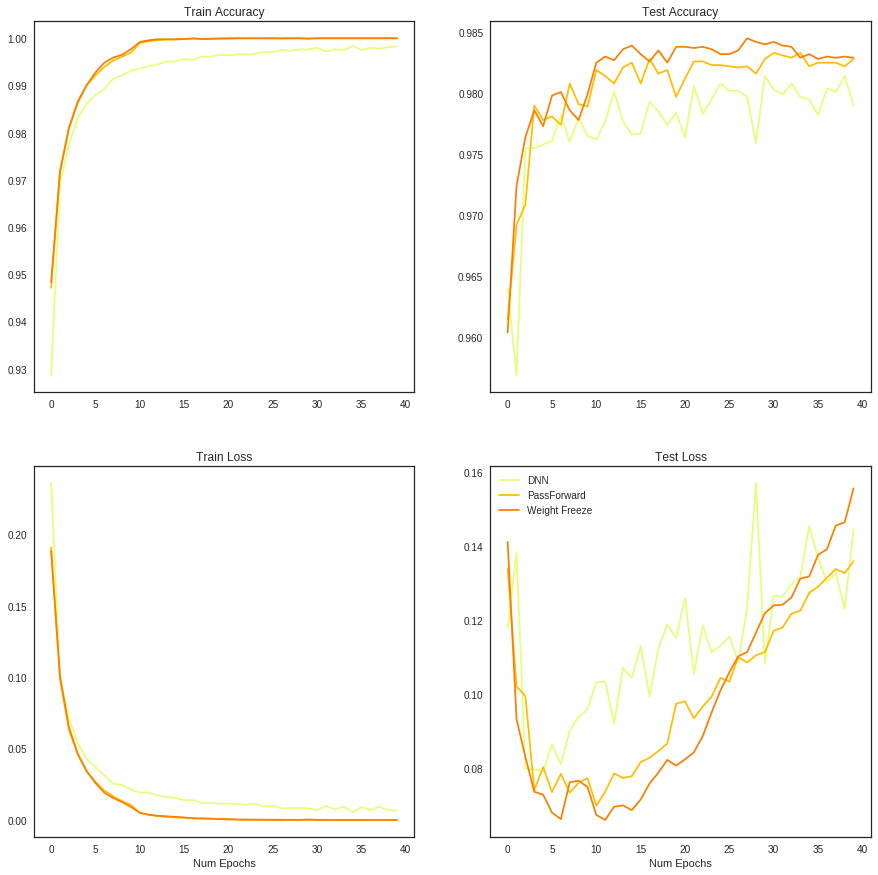

In [57]:
plot_list = []
plot_list.append(make_tuple('DNN', dnn.summary['accuracy'], dnn.summary['loss'],
             dnn.summary['val_accuracy'], dnn.summary['val_loss']))
#plot_list.append(make_tuple('ForwardThinking', forward.summary['accuracy'], forward.summary['loss'],
#             forward.summary['val_accuracy'], forward.summary['val_loss']))
plot_list.append(make_tuple('PassForward', passForward.summary['accuracy'], passForward.summary['loss'],
             passForward.summary['val_accuracy'], passForward.summary['val_loss']))
plot_list.append(make_tuple('Weight Freeze', passForwardFreeze.summary['accuracy'], passForwardFreeze.summary['loss'],
             passForwardFreeze.summary['val_accuracy'], passForwardFreeze.summary['val_loss']))
#plot_list.append(make_tuple('Cake', cake.summary['accuracy'], cake.summary['loss'],
#             cake.summary['val_accuracy'], cake.summary['val_loss']))


plot_all(plot_list)

## DNN

A simple DNN. No big deal.

In [9]:
dnn = DNN([784, 150, 100, 50, 10])
dnn.fit(x_train, y_train, x_test, y_test, epochs=40, verbose=False, reg_type='l2', reg=.000001)

KeyboardInterrupt: 

In [ ]:
plot_acc_loss(dnn.summary['accuracy'], dnn.summary['loss'],
             dnn.summary['val_accuracy'], dnn.summary['val_loss'])

In [ ]:
model_summary(dnn)

## Forward Thinking

Pass the data through a layer and into new uninitialized layer

In [ ]:
forward = ForwardThinking([784, 150, 100, 50, 10])
forward.fit(x_train, y_train, x_test, y_test, epochs=10, verbose=False, reg_type='l2', reg=.000001)

In [ ]:
plot_acc_loss(forward.summary['accuracy'], forward.summary['loss'],
             forward.summary['val_accuracy'], forward.summary['val_loss'])

In [ ]:
model_summary(forward)

## Pass Forward Thinking

Train layerwise, but also keep connections from old data in classification.

In [8]:
passForward = PassForwardThinking([784, 150, 100, 50, 10], freeze=False)
passForward.fit(x_train, y_train, x_test, y_test, epochs= 10, verbose=False, reg_type='l2', reg=.000001)

KeyboardInterrupt: 

In [ ]:
plot_acc_loss(passForward.summary['accuracy'], passForward.summary['loss'],
             passForward.summary['val_accuracy'], passForward.summary['val_loss'])

In [ ]:
model_summary(passForward)

## Pass Forward Thinking (with weight freezing)

Train layerwise like before, however freeze the connections of old weights once learned.

In [ ]:
passForwardFreeze = PassForwardThinking([784, 150, 100, 50, 10], freeze=True)
passForwardFreeze.fit(x_train, y_train, x_test, y_test, epochs=10, verbose=False, reg_type='l2', reg=.000001)

In [ ]:

plot_acc_loss(passForwardFreeze.summary['accuracy'], passForwardFreeze.summary['loss'],
             passForwardFreeze.summary['val_accuracy'], passForwardFreeze.summary['val_loss'])

In [ ]:
model_summary(passForwardFreeze)

In [33]:
cake = WeddingCake(784, 100, 10, 3)
cake.fit(x_train, y_train, x_test, y_test, epochs=10, verbose=False)

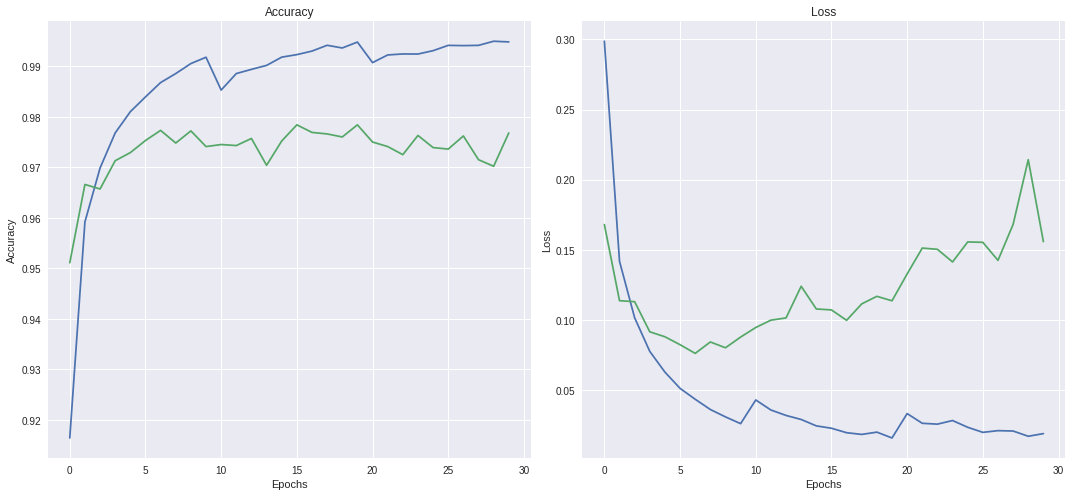

In [34]:
plot_acc_loss(cake.summary['accuracy'], cake.summary['loss'],
             cake.summary['val_accuracy'], cake.summary['val_loss'])

In [35]:
model_summary(cake)

Model Name: WeddingCake
Model Version: 1.0                 
Training Time: 163.015917063
Training Acc: 0.994816666667
Testing Acc: 0.9768


## Observations

These results are on just MNIST so the gains arn't huge, however the results are pretty sweet! Pass forward approaches overcome the issues with loosing accuracy when new layers are added. Further, freezing the layers serves as a way to regularize and speed it up. Both pass forwards are consistently better than a DNN with the same archetecture. It is also cool to note we can see when layers are added in the accuracy graph. There are increases at epochs 10 and 20. 